<hr style='height:4px; background-color:black; border:none; margin-top:20px; margin-bottom:20px;'>

# **Name:** Tim Hollis  
# **Course:** DSC540 - Data Preparation  
# **Date:**  01/18/2026
# **Assignment:** Week 3 & 4 Exercises 

<hr style='height:2px; background-color:black; border:none; margin-top:20px; margin-bottom:20px;'>

## **Data Sources & File Loading**

**Datasets:**
- **stock.csv** — A CSV file containing stock ticker symbols and prices.  
- **Sample - Superstore.xlsm** — An Excel dataset containing retail transaction records.  

**Source:** Both datasets are from the online repository for *The Data Wrangling Workshop* textbook.

**File Loading Approach:**  
For maximum portability and to ensure the code runs without modification, both files are loaded using simple file names. I took this approach to:

- Eliminate hard-coded absolute paths that fail on different systems (my initial direction)
- Allow the code to be run by placing the files in the same directory for grading

  
I included error handling to provide clear guidance if files are not found (added because I continued throwing an error, so I added error handling to address those possibilities occurring).

**Note on File Format:**  
The original Superstore dataset was provided as `.xls` but was converted to `.xlsm` format for compatibility. The `openpyxl` engine is used to read this file, which I am including in my submission.

In [45]:
# Import Needed Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Datasets
stock_path = 'stock.csv'
superstore_path = 'Sample - Superstore.xlsm'

# Adding error handling (explanation above)
try:
    data = np.genfromtxt(
        stock_path,
        delimiter=',',
        names=True,
        dtype=None,
        encoding='ascii'
    )
    print(f'✅ Successfully loaded: stock.csv')
    print(f'   Shape of data array: {data.shape}')
except FileNotFoundError as e:
    print(f'❌ Error loading stock.csv: {e}')
    print('   Make sure stock.csv is in the same directory as this notebook.')
    raise

try:
    df = pd.read_excel(superstore_path, engine='openpyxl')
    print(f'✅ Successfully loaded: Sample - Superstore.xlsm')
    print(f'   DataFrame shape: {df.shape}')
except FileNotFoundError as e:
    print(f'❌ Error loading Superstore file: {e}')
    print('   Make sure Sample - Superstore.xlsm is in the same directory as this notebook.')
    raise

print('\n' + '='*50)
print('✅ All datasets loaded successfully!')
print('='*50)

✅ Successfully loaded: stock.csv
   Shape of data array: (49,)
✅ Successfully loaded: Sample - Superstore.xlsm
   DataFrame shape: (9994, 21)

✅ All datasets loaded successfully!


<hr style='height:2px; background-color:#444; border:none; margin-top:30px; margin-bottom:25px;'>

### **Q1 - Textbook Activity 3.01: Creating NumPy Arrays and Reading a CSV**

For this activity, I will create Python lists and NumPy arrays, inspect their data types, and display data from the `stock.csv` file into a NumPy structured array using `np.genfromtxt`.

---
### **Steps to complete activity:**

1. Create a Python list with elements 1, 2, and 3.  
2. Convert the list into a NumPy array.  
3. Create a floating‑point NumPy array.  
4. Check the data types of all created objects.  
5. Display results from above steps, and data from CSV file "stock.csv."

**Note: dataset was loaded in initial setup, and will be called using "data"**

<hr style='height:2px; background-color:#444; border:none; margin-top:30px; margin-bottom:25px;'>

In [46]:
# 1. Create a list with numbers 1-3
list_1 = [1, 2, 3]

# 2. Convert list to NumPy array
array_1 = np.array(list_1)

# 3. Create an array directly with floating elements
a = np.array([1.2, 3.4, 5.6])

# 4. Setup to check datatypes
type_list1 = type(list_1)
type_array1 = type(array_1)
type_a = type(a)

# 5. Display results
print('list_1:', list_1)
print('\narray_1:', array_1)
print('\na:', a)
print('\nData type: list_1 -', type_list1)
print('\nData type: array_1 -', type_array1)
print('\nData type: a -', type_a, '\n')
print(data)
print('\nData type: data -', type(data))
print('\nStock data summary:\n')
print(f'Number of stocks: {len(data)}')
print(f'Min price: ${data["Price"].min()}, Max price: ${data["Price"].max()}')

list_1: [1, 2, 3]

array_1: [1 2 3]

a: [1.2 3.4 5.6]

Data type: list_1 - <class 'list'>

Data type: array_1 - <class 'numpy.ndarray'>

Data type: a - <class 'numpy.ndarray'> 

[('MMM', 100) ('AOS', 101) ('ABT', 102) ('ABBV', 103) ('ACN', 104)
 ('ATVI', 105) ('AYI', 106) ('ADBE', 107) ('AAP', 108) ('AMD', 109)
 ('AES', 110) ('AET', 111) ('AMG', 112) ('AFL', 113) ('A', 114)
 ('APD', 115) ('AKAM', 116) ('ALK', 117) ('ALB', 118) ('ARE', 119)
 ('ALXN', 120) ('ALGN', 121) ('ALLE', 122) ('AGN', 123) ('ADS', 124)
 ('LNT', 125) ('ALL', 126) ('GOOGL', 127) ('GOOG', 128) ('MO', 129)
 ('AMZN', 130) ('AEE', 131) ('AAL', 132) ('AEP', 133) ('AXP', 134)
 ('AIG', 135) ('AMT', 136) ('AWK', 137) ('AMP', 138) ('ABC', 139)
 ('AME', 140) ('AMGN', 141) ('APH', 142) ('APC', 143) ('ADI', 144)
 ('ANDV', 145) ('ANSS', 146) ('ANTM', 147) ('AON', 148)]

Data type: data - <class 'numpy.ndarray'>

Stock data summary:

Number of stocks: 49
Min price: $100, Max price: $148


### **Summary**

This activity demonstrated how to create arrays directly, as well as by converting Python lists,
inspect their data types, and load structured CSV data using `np.genfromtxt`.  

<hr style='height:2px; background-color:#444; border:none; margin-top:30px; margin-bottom:25px;'>


### **Q2 - Textbook Activity 4.01: Reading Excel, Dropping Columns, Checking Shape**

For this activity, I will use the previously loaded Excel dataset `Sample - Superstore.xls`, examine its structure, remove an unnecessary column, and verify the dataset’s dimensions using the `shape` attribute.

### **Note on Loading the Excel Dataset**

The textbook instructions state to install `xlrd` and load the `Sample - Superstore.xls` file directly; however, the original `.xls` file could not be read in my environment, so I converted it to a modern Excel format using LibreOffice. The `.xlsx` option was not available, so I saved the file as an `.xlsm` (Excel macro‑enabled) workbook instead.

After converting the file, I loaded it successfully in the initial setup code chunk, which allowed me to complete Activity 4.01 as intended.

### **Steps to complete**

1. Display the first few rows of the dataset.  
2. Drop the Row ID column.  
3. Display the updated DataFrame.  
4. Check the number of rows and columns using `df.shape`.
5. Display additional insights about the dataset, including general statistical data, total profit, and a plot with categorical data

**Note: dataset was loaded in initial setup, and will be called using "df"**

Initial DataFrame:

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       4242

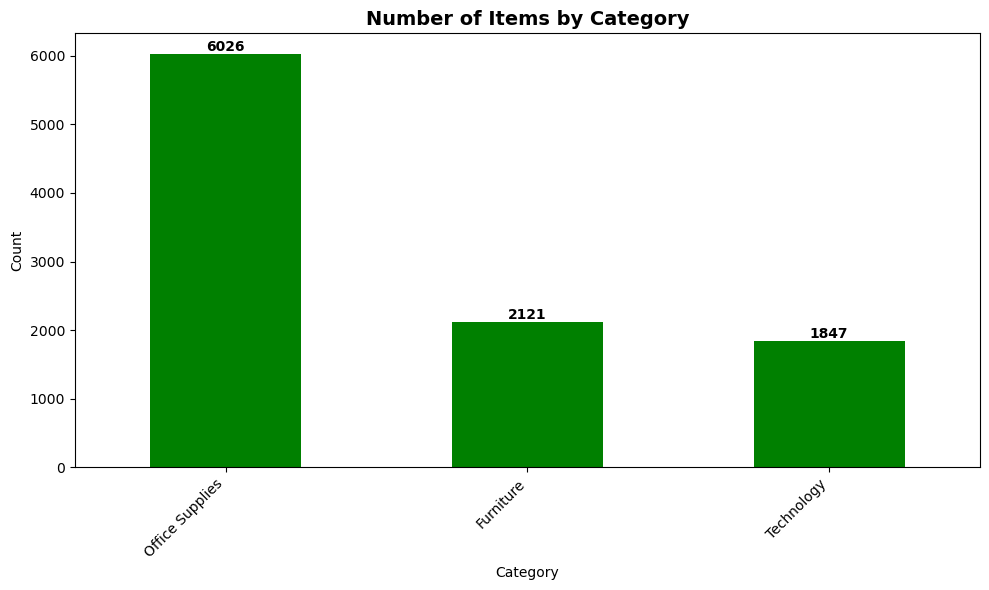

In [47]:
# 1. Display initial rows of the dataset
print('Initial DataFrame:\n')
print(df.head())
print('\nDataset shape:', df.shape)

# 2. Drop the 'Row ID' column
df.drop('Row ID', axis=1, inplace=True)

# 3. Display updated rows of the dataset
print('\nDataFrame after dropping "Row ID":\n')
print(df.head())

# 4. Display dataset shape
print('\nDataset shape:', df.shape)

# 5. Display additional insights
print('\nQuick insights from Superstore:\n')
print(df[['Sales', 'Profit']].describe(), '\n')
print(f'Total profit: ${df["Profit"].sum():,.2f}')

# 5. (continued) Plot with category count
plt.figure(figsize=(10, 6))
bars = df['Category'].value_counts().plot(kind='bar', color='green')
plt.title('Number of Items by Category', fontsize=14, fontweight='bold')
plt.ylabel('Count')
plt.xlabel('Category')
plt.xticks(rotation=45, ha='right')
for bar in bars.patches:
    height = bar.get_height()
    bars.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )
plt.tight_layout()
plt.show()

### **Summary**

This activity demonstrated how to load Excel data into pandas, inspect the first few rows, remove an unnecessary identifier column, and verify the dataset’s dimensions. After dropping the Row ID column, the dataset contains **9,994 rows and 20 columns**. Additional information regarding the data itself was added to highlight statistical and categorical data, as well as a calculated total profit value.

<hr style='height:2px; background-color:#444; border:none; margin-top:30px; margin-bottom:25px;'>

### **Q3: Creating Series and Index Labels and Performing Arithmetic Operations**

For this activity, I will create two pandas series with different index labels and perform arithmetic operations that demonstrate pandas’ automatic index alignment.

### **Steps to complete**

1. Create Series 1 with values 7.3, -2.5, 3.4, 1.5, and indices a, c, d, e.  
2. Create Series 2 with values -2.1, 3.6, -1.5, 4, 3.1, and indices a, c, e, f, g.  
3. Add the two Series together.  
4. Subtract Series 1 from Series 2.  
5. Print all results.
6. Create a table to highlight `NaN` values

In [48]:
# 1. Create series 1
series1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])

# 2. Create series 2
series2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])

# 3. Add the two series together
addition_result = series1 + series2

# 4. Subtract the first series from the second
subtraction_result = series2 - series1

# 5. Print results
print('Series 1:\n')
print(series1)
print('\nSeries 2:\n')
print(series2)
print('\nAddition Result:\n')
print(addition_result)
print('\nSubtraction Result:\n')
print(subtraction_result, '\n')

# 5. (continued) Create table view

combined = pd.DataFrame({
    'Series 1': series1,
    'Series 2': series2,
    'Addition': series1 + series2,
    'Subtraction': series2 - series1
})
styled = combined.style\
    .format('{:.1f}')\
    .highlight_null(color='red')\
    .set_caption('Table')\
    .set_table_styles([
        {'selector': 'caption', 'props': [
            ('font-size', '16px'), ('font-weight', 'bold')]},
        {'selector': 'th', 'props': [
            ('font-weight', 'bold'), ('text-align', 'center')]}
    ])
styled

Series 1:

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

Series 2:

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

Addition Result:

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

Subtraction Result:

a   -9.4
c    6.1
d    NaN
e   -3.0
f    NaN
g    NaN
dtype: float64 



,Series 1,Series 2,Addition,Subtraction
a,7.3,-2.1,5.2,-9.4
c,-2.5,3.6,1.1,6.1
d,3.4,nan,nan,nan
e,1.5,-1.5,0.0,-3.0
f,nan,4.0,nan,nan
g,nan,3.1,nan,nan


### **Summary**

In this section, I created two pandas Series with mismatched indices:

- **Series 1**: values = [7.3, -2.5, 3.4, 1.5], indices = ['a', 'c', 'd', 'e']
- **Series 2**: values = [-2.1, 3.6, -1.5, 4, 3.1], indices = ['a', 'c', 'e', 'f', 'g']

I then performed basic arithmetic operations:

- **Addition** (`Series 1 + Series 2`)
- **Subtraction** (`Series 2 - Series 1`)

**Key observations**:
- Pandas automatically aligns the operations based on index labels rather than position.
- Where indices match (a, c, e), the arithmetic produces expected numeric results.
- Where an index exists in only one Series (d in Series 1; f and g in Series 2), the result is **NaN** which basically is missing data; this allows combining datasets with different (or incomplete) keys without manual merging or looping.

The visualization (side-by-side table with highlighted NaNs) clearly demonstrates this alignment rule and makes it easy to spot where data is missing.
<hr style='height:4px; background-color:black; border:none; margin-top:20px; margin-bottom:20px;'>

<hr style="border: none; border-top: 5px dashed blue;">

# Assignment Reflection 

## Overall Reflection

These two weeks provided a strong foundation in two essential tools for data wrangling: NumPy for efficient numerical array operations and pandas for labeled, tabular data manipulation. Completing Activity 3.01, Activity 4.01, and the Series arithmetic task helped me solidify the differences between position-based (NumPy) and label-based (pandas) indexing, as well as practical skills for loading, inspecting, and cleaning real datasets.  

I particularly appreciated how the exercises progressed logically—from basic array creation to structured file loading, then to pandas DataFrame cleaning, and finally to understanding automatic index alignment in arithmetic operations. The hands-on practice reinforced why these libraries are industry standards: NumPy offers speed and structure for numerical work, while pandas makes everyday data tasks (cleaning, subsetting, combining) far more intuitive and less error-prone than manual loops or lists of dictionaries.

Overall, I feel more confident reading documentation, adapting code to modern library versions (e.g., using `openpyxl` instead of deprecated `xlrd`), and explaining key concepts like NaN handling during alignment.

## Straightforward Portions of the Assignment

Several parts felt intuitive and flowed naturally:

- Creating and converting lists to NumPy arrays (`list_1 → array_1`, direct float array creation)  
- Checking object types with `type()` — simple and immediate feedback  
- Loading the stock.csv file with `np.genfromtxt` — the parameters (`names=True`, `dtype=None`, `encoding='ascii'`) were clearly explained in the book and worked on the first try  
- Dropping the 'Row ID' column and verifying shape in pandas — very straightforward once I remembered `axis=1` and `inplace=True`  
- Printing the Series and their arithmetic results — basic operations that immediately showed the expected NaN behavior  

These sections built confidence quickly and required minimal debugging.

## More Challenging Aspects of the Assignment

A few areas required extra thought, experimentation, or adaptation:

- Understanding and troubleshooting file paths — switching from absolute to relative paths caused FileNotFoundErrors until I verified the file location
- Grasping why `openpyxl` was needed instead of the book’s `xlrd` recommendation — I had to research the deprecation warning and confirm the engine parameter  
- Visualizing index alignment effectively, deciding between a bar plot and a styled DataFrame table took iteration; the table ultimately proved clearer for highlighting NaNs, but required learning `.style` methods and `.highlight_null`  
- Ensuring consistent variable names across cells (`series1` vs `s1`) — a small but frustrating NameError that reminded me to run cells sequentially and double-check naming  

These challenges were valuable because they mimicked real-world scenarios (changing environments, outdated instructions, debugging scope issues) and forced me to read error messages carefully and consult documentation.

## Start / Stop / Continue

**Start**  
- Routinely using relative paths from the beginning of a project to improve portability  
- Adding quick exploratory steps after loading data (e.g., `.dtype`, `.describe()`, value counts) even when not required to help catch issues early  
- Incorporating simple visualizations or styled tables earlier in the workflow to reinforce concepts visually  

**Stop**  
- Relying on absolute paths with usernames, as they break easily when sharing or moving notebooks  
- Running cells out of order without restarting the kernel, as it leads to hidden NameErrors and stale variables  
- Accepting deprecated library warnings without investigating alternatives (e.g., sticking with `xlrd` instead of switching to `openpyxl`)  

**Continue**  
- Writing original summaries and explanations after each major section, it helps solidify understanding and makes the notebook more useful for future reference  
- Adding comments that explain *why* code behaves a certain way (e.g., why NaN appears)  
- Experimenting with enhancements like styled DataFrames, `tight_layout()`, and `rotation` on plots, these small touches improve readability

<hr style="border: none; border-top: 5px dashed blue;">